### 2-D Norm Visualization

Let's start with the $\ell_{1}$ norm in the 2-D scenario. <br></br>

The $\ell_{1}$ norm is represented by the notation - 

$$||x||_{1}$$

We begin with a line with the following equation with the aim of minimizing the $\ell_{1}$ norm: 

$$x_{2} = 2x_{1} + 3$$

In [159]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [160]:
x1 = np.arange(-10,11,.01)
line_fun = lambda x: (2 * x) + 3
x2 = line_fun(x1)

<IPython.core.display.Javascript object>


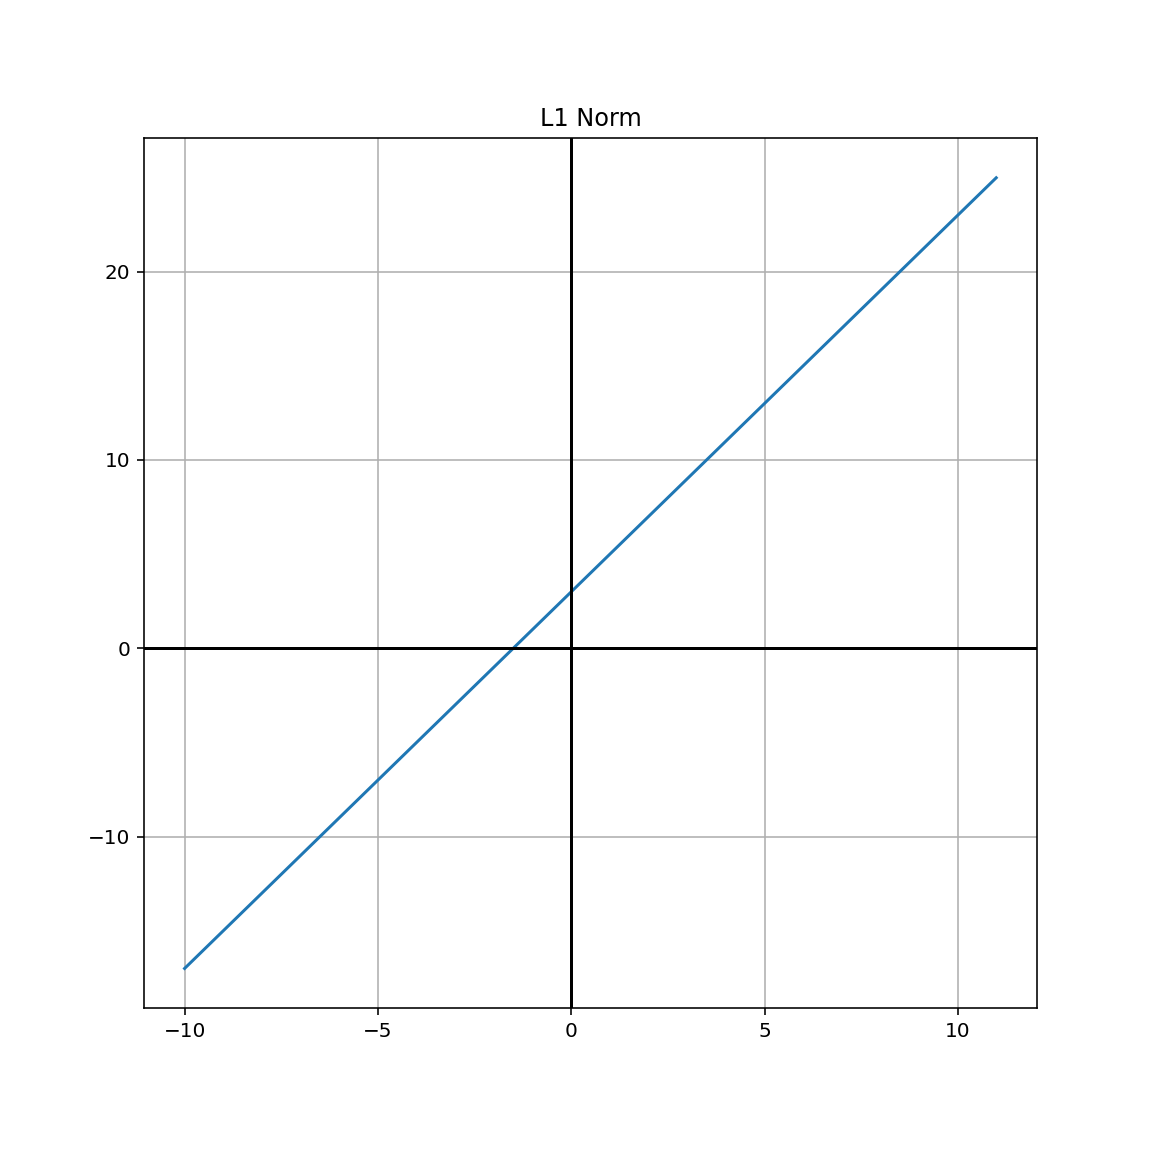

In [161]:
plt.figure(figsize=(8,8))
plt.title('L1 Norm')
plt.plot(x1,x2)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show();

$$ \ell_{1} norm: ||x||_{1} = \sum_{i=1}^{n}|x_{i}|$$

In [162]:
l1_norm = np.sum(np.vstack((np.abs(x1), np.abs(x2))), axis=0)

In [163]:
idxmin = np.argmin(l1_norm)

In [164]:
l1_coords = x1[idxmin], x2[idxmin]

In [165]:
norm = abs(x1[idxmin]) + abs(x2[idxmin])

In [166]:
norm

1.5000000000005436

Next we can plot the norm as a point on the graph below: 

<IPython.core.display.Javascript object>


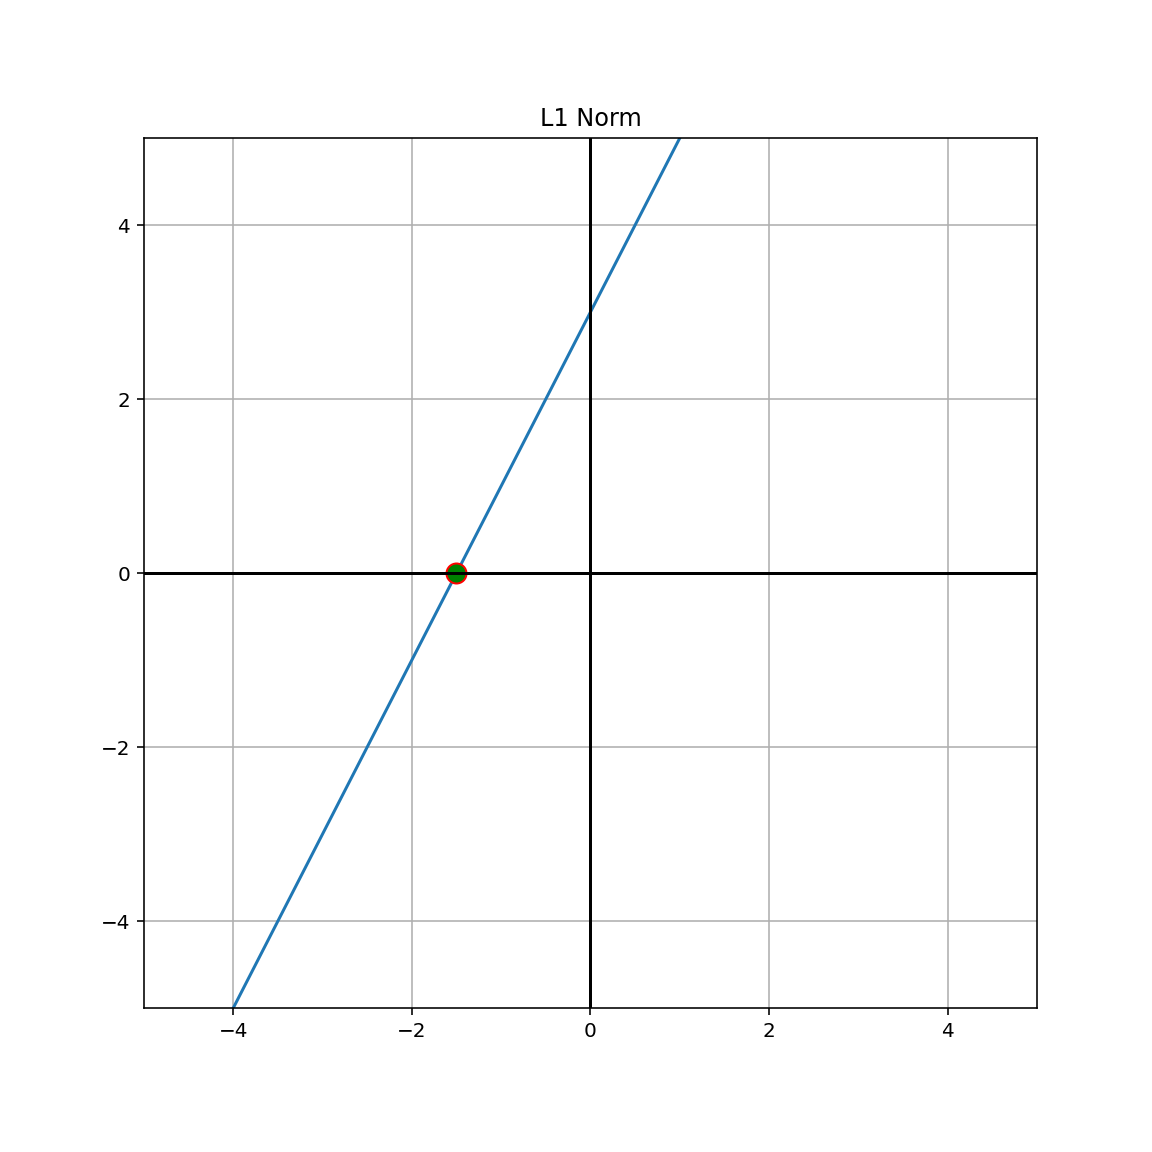

In [167]:
plt.figure(figsize=(8,8))
plt.title('L1 Norm')
plt.plot(x1,x2)
plt.plot(l1_coords[0], l1_coords[1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show();

Now if we look at all of the points where $|x_{1}| + |x_{2}| \approx 1.50$, we can get an approximate intuition of the shape of the $\ell_{1}$ norm.

Of course we need to capture both the negative on positive sides of this because of the absolute value, and we can see the result in the plot below.

In [168]:
x1_norm = np.arange(-norm, norm, 0.1)
x2_norm_pos = norm - abs(x1_norm)
x2_norm_neg = -x2_norm_pos

<IPython.core.display.Javascript object>


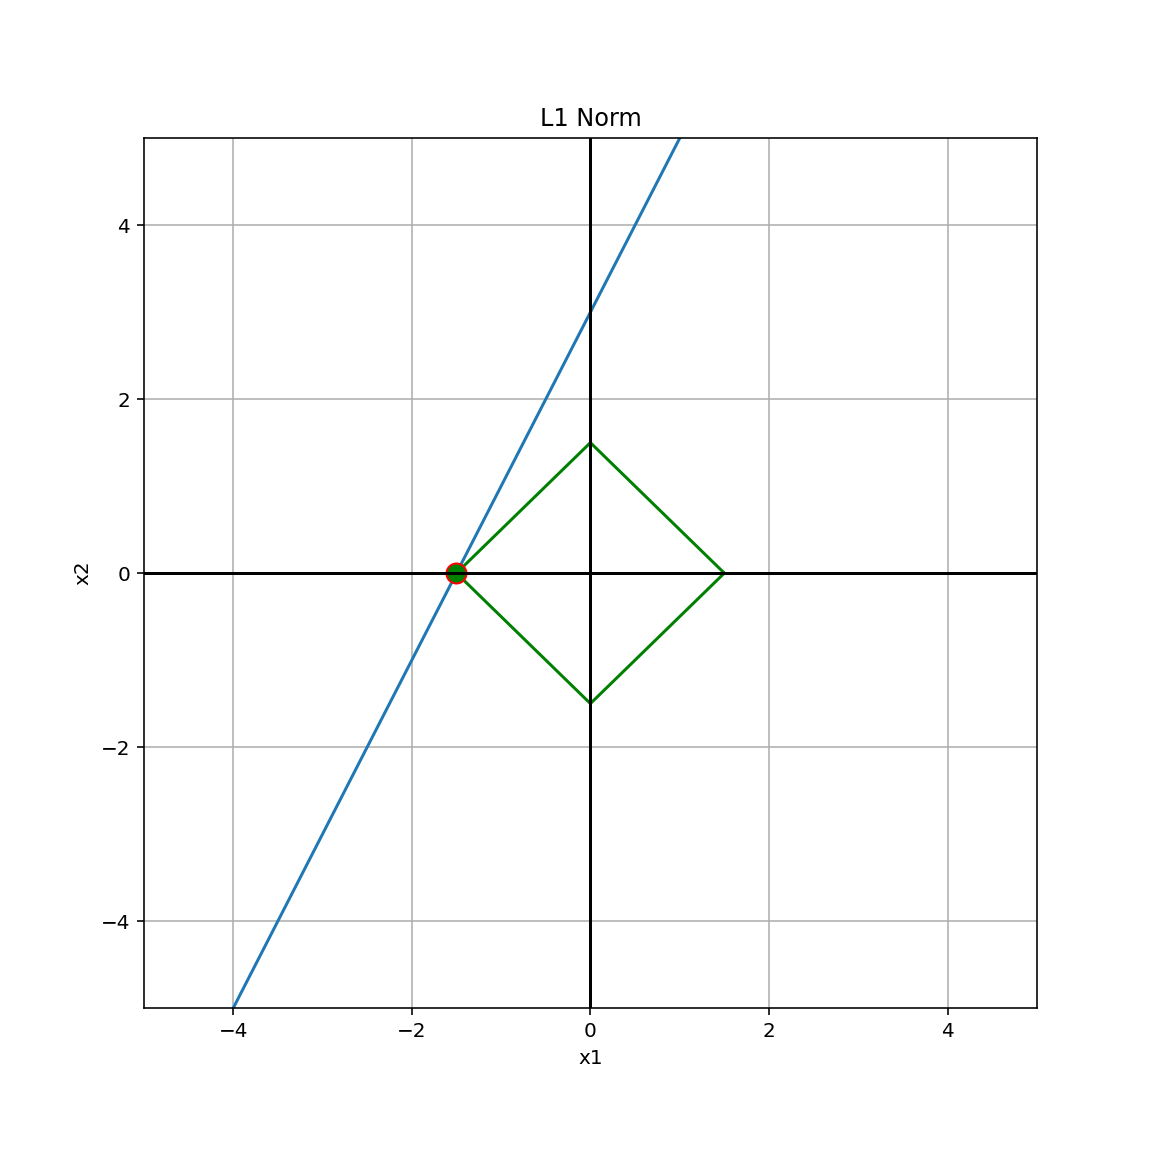

In [169]:
plt.figure(figsize=(8,8))
plt.title('L1 Norm')
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x1,x2)
plt.plot(x1_norm, x2_norm_pos, color='green')
plt.plot(x1_norm, x2_norm_neg, color='green')
plt.plot(l1_coords[0], l1_coords[1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show();

We can see that the $\ell_{1}$ norm is given by this diamond like shape.

Again as a reminder the norm is found by minimizing the sum of the absolute values of each component of the function.

---

### 3-D Norm Visualization

We can create the same type of visual in the 3-D space.

This time instead of using a line we will use a plane with the following equation:

$$ x_{3} = 2x_{1} + 3x_{2} + 4 $$

In [170]:
x1 = np.arange(-10, 10, .01)
x2 = np.arange(-10, 10, .01)
plane_func = lambda x1, x2: (2*x1) + (3*x2) + 4

<IPython.core.display.Javascript object>


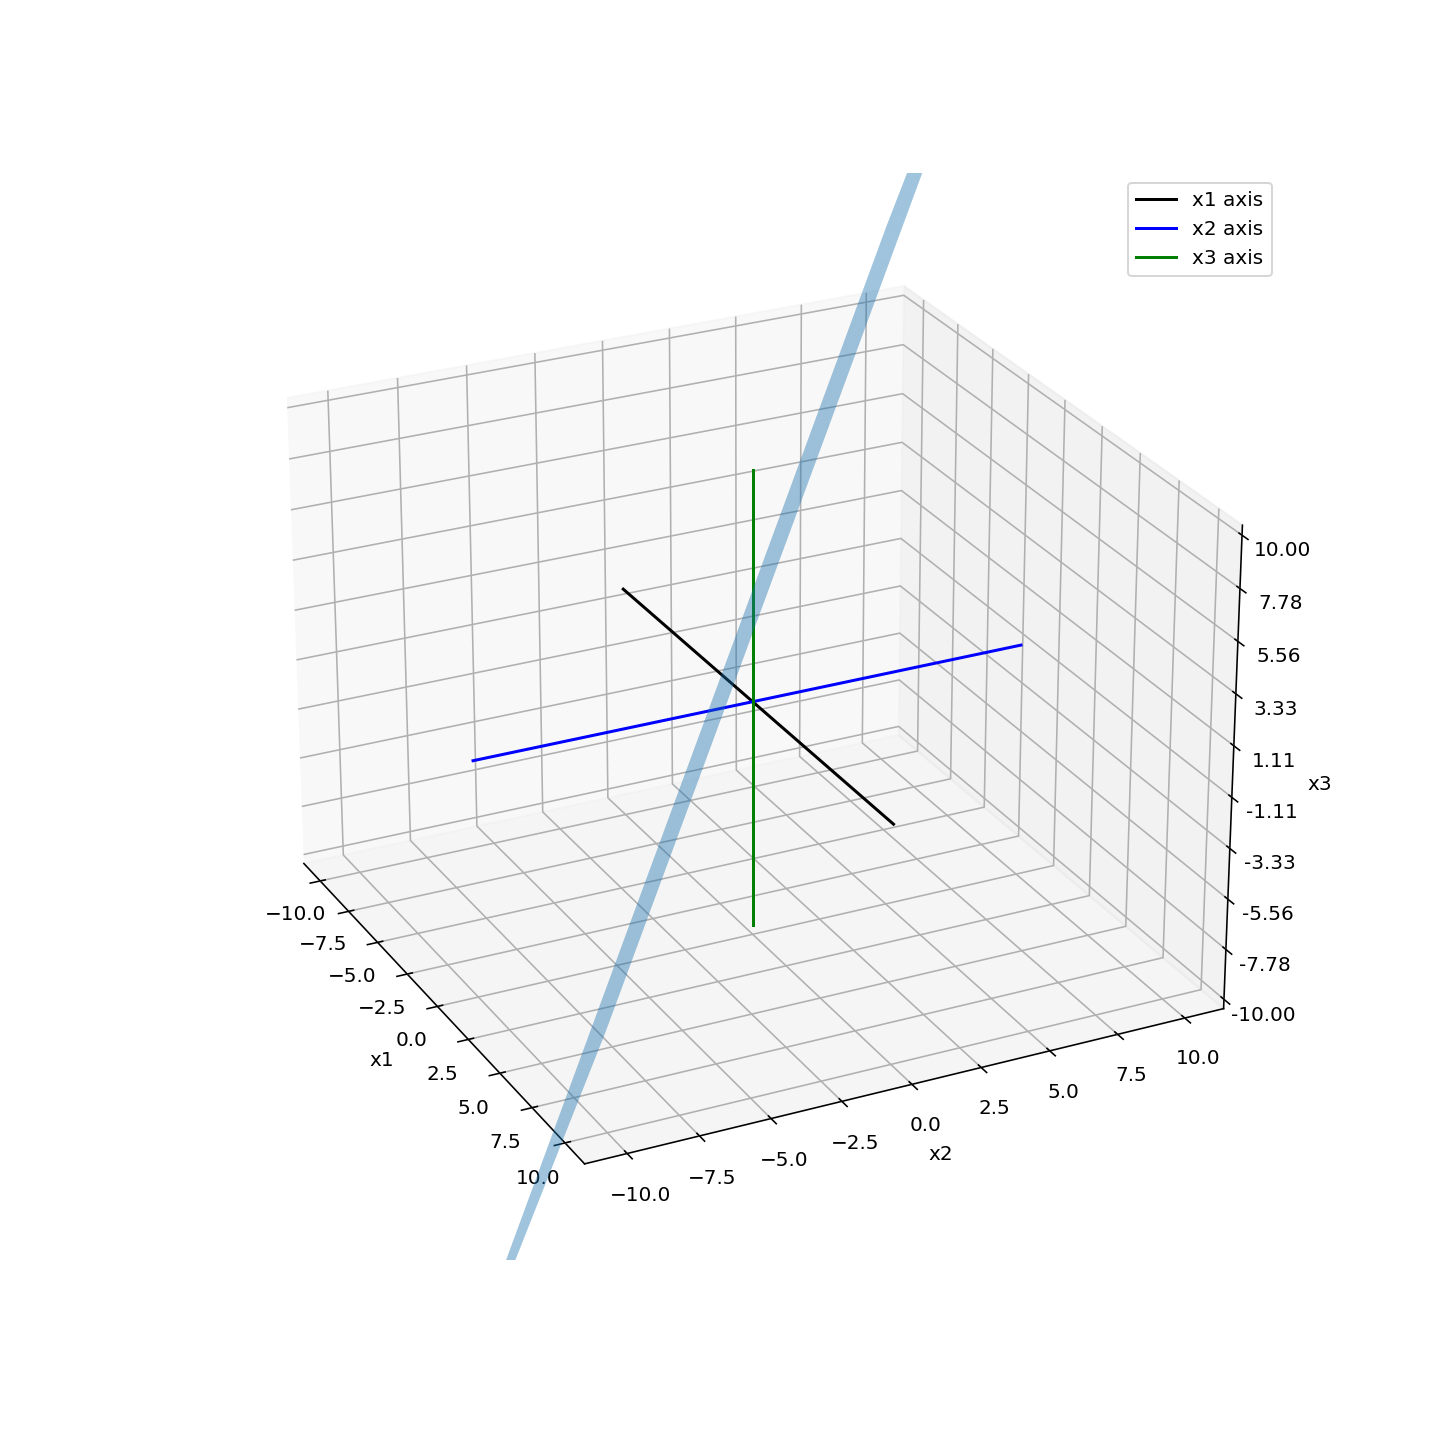

In [173]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})

X1, X2 = np.meshgrid(x1, x2)
X3 = plane_func(X1, X2)

surf = ax.plot_surface(X1, X2, X3, alpha=.5)

ax.plot([-10,10],[0,0], [0,0], color='black',label='x1 axis')
ax.plot([0,0],[-10,10], [0,0], color='blue', label='x2 axis')
ax.plot([0,0],[0,0],[-10,10],color='green',label='x3 axis')

ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.legend()


plt.show()

Now our $\ell_{1}$ norm equation has 3 components instead of 2: 

$$ \ell_{1} norm: ||x||_{1} = \sum_{i=1}^{n}|x_{i}|$$

**Side Note:** for a simpler illustration for `np.meshgrid`.

It takes all possible permutations of `x1` and `x2` values and finds `x3` at those points (given by $f(x_{1},x_{2})$).

In [172]:
x1 = np.arange(-10, 10, .01)
x2 = np.arange(-10, 10, .01)
plane_func = lambda x1, x2: (2*x1) + (3*x2) + 4

x3 = []
# Loop through all values in x1 direction
for val1 in x1:
    # Create subarray to return a multi dimensional result
    sub_x3 = []
    # Loop through all values in x2 direction
    for val2 in x2:
        sub_x3.append(plane_func(val1, val2))
    # Append subarray to final array    
    x3.append(np.array(sub_x3)) 
# Convert to numpy
x3 = np.array(x3)

---

Now if we combine all three of these arrays into `x,y,z` coordinate pairs, we can find where the norm is minimized.

---

In [15]:
coords = np.stack((X1, X2, X3)).T

# Calculate L1 Norm of each coordinate pair 
coord_sum = np.abs(coords[..., 0]) + np.abs(coords[..., 1]) + np.abs(coords[..., 2])

In [1]:
# Find where norm is minimized
np.min(coord_sum)

NameError: name 'np' is not defined

In [17]:
# Check the components of the minimized norm
min_coords = coords[np.where(coord_sum <= np.min(coord_sum))].flatten()

In [18]:
print(min_coords)

[-2.13162821e-13 -1.33000000e+00  1.00000000e-02]


If we calculate the norm by hand, we know that this should actually be $(0, -4/3, 0)$, but because of floating point operations in python, and the way we created our numpy array (`np.arange` with 0.01 increments), this is a satisfactory answer.

In [174]:
def satisfies_fn(coordinates, A=[2, 3, -1], b=4):
    '''
    Sanity check to make sure the dot products of our coordinates with our original matrix A is approximately 0.
    
    This may be slightly different from 0 due to floating point operations, so I use a small epsilon value to
    substitute for 0.
    '''
    eps = 1e-10
    assert np.all(np.abs(np.dot(coords, A) + 4) <= eps), "\033[93mFunction not satisfied error\033[0m"
    print("\033[92mCoordinates satisfied!\033[0m")

In [175]:
satisfies_fn(coords)

Coordinates satisfied!


Techincally the optimal solution would be (0, -4/3, 0), but since we have performed a mesh grid we aren't search every single location and we come up with a nearby solution.

The nearest solution per our coordinates would be:



In [21]:
close_opt_x1 = np.abs(np.array(x2 + 0)).argmin()
print('x1min')
print(x1[close_opt_x1])

close_opt_x2 = np.abs(np.array(x2 + (4/3))).argmin()
print('\nx2min')
print(x2[close_opt_x2])
close_opt_x3 = np.abs(np.array(x3 + 0)).argmin()
print('\nx3min')
print(x3.flatten()[close_opt_x3])

print('\nSummin')
print(abs(x2[close_opt_x2]) + abs(x1[close_opt_x1]) + abs(x3.flatten()[close_opt_x3]))

x1min
-2.1316282072803006e-13

x2min
-1.3300000000001848

x3min
-9.769962616701378e-13

Summin
1.330000000001375


<IPython.core.display.Javascript object>


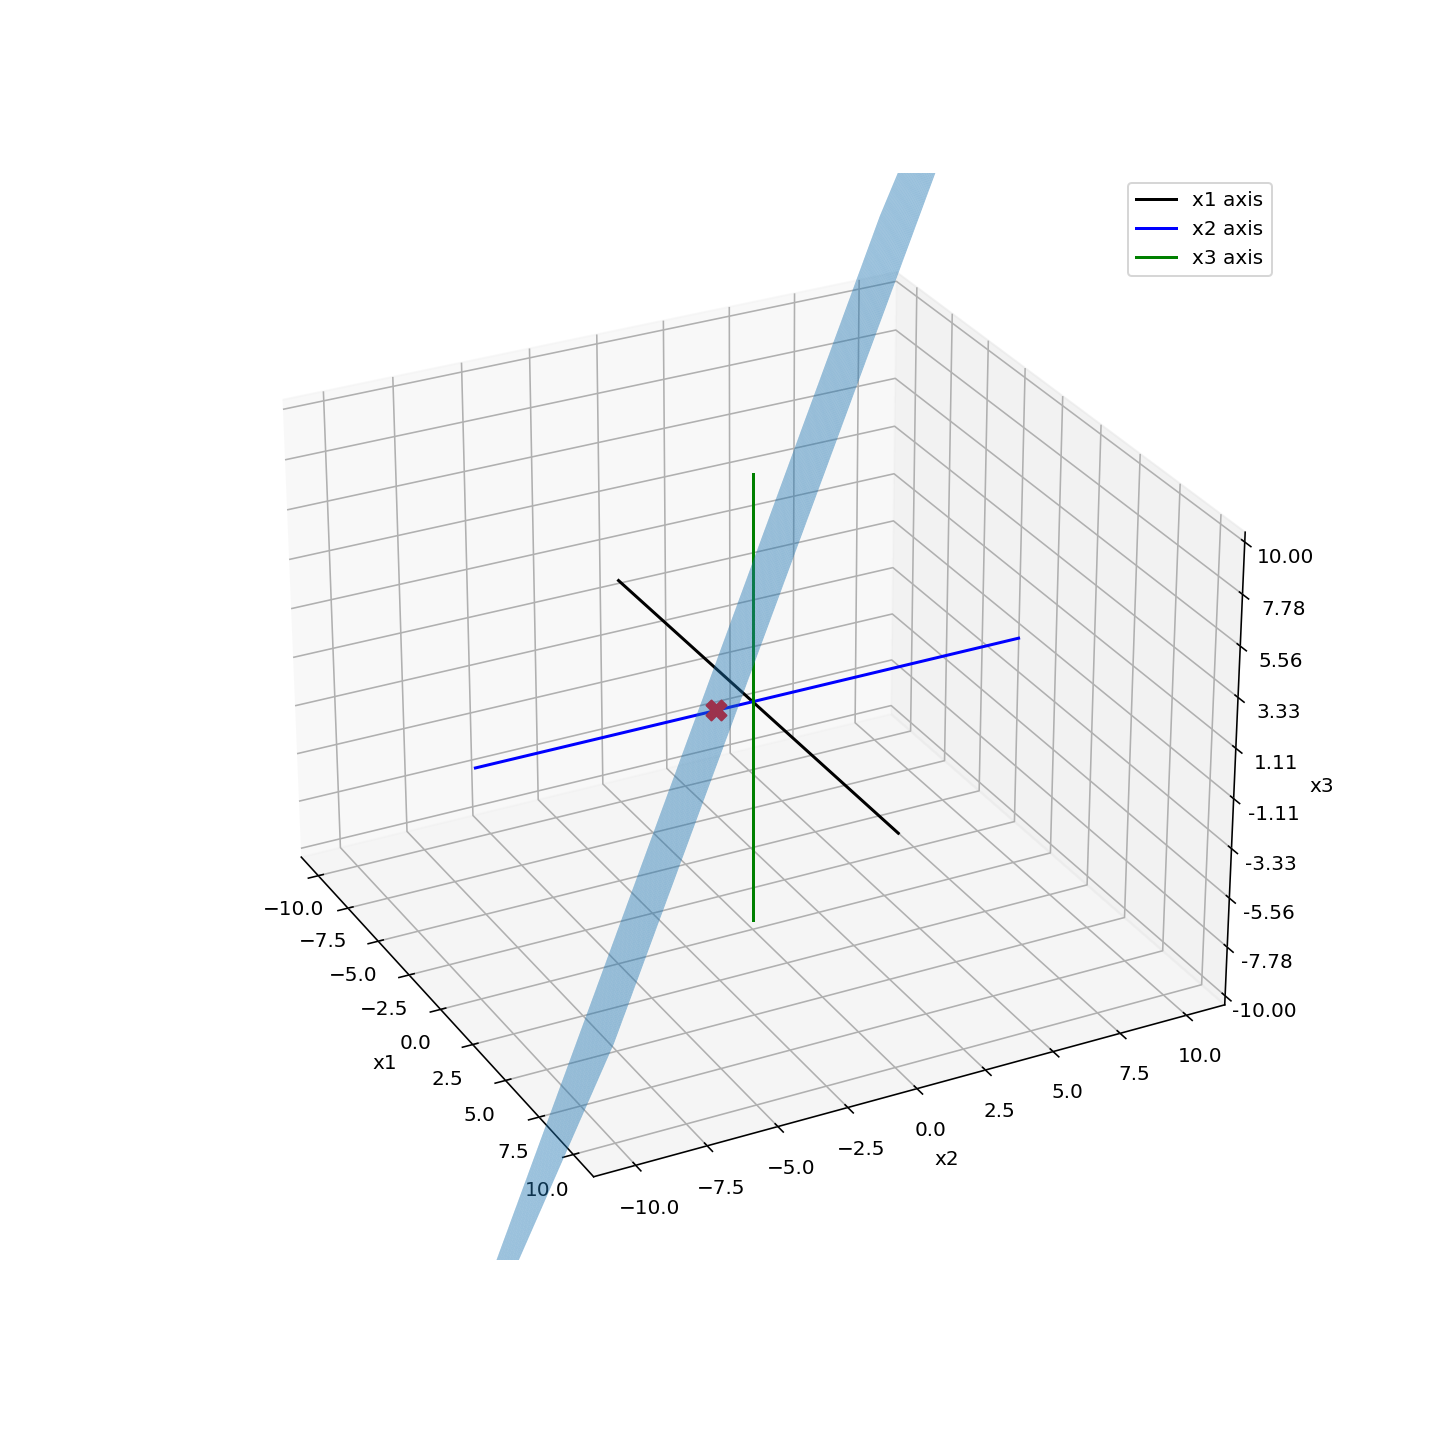

In [176]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})

X1, X2 = np.meshgrid(x1, x2)
X3 = plane_func(X1, X2)

surf = ax.plot_surface(X1, X2, X3, alpha=.5)

ax.plot([-10,10],[0,0], [0,0], color='black',label='x1 axis')
ax.plot([0,0],[-10,10], [0,0], color='blue', label='x2 axis')
ax.plot([0,0],[0,0],[-10,10],color='green',label='x3 axis')

ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')


xx, yy, zz = min_coords

ax.scatter(xx, yy, zz, c='red', marker='X', s=100)

plt.legend()


plt.show()

---

Now we can look at the entire surface which minimizes the $\ell_{1}$ norm.

In [23]:
x1 = np.arange(-10, 10, .01)
x2 = np.arange(-10, 10, .01)

X1, X2 = np.meshgrid(x1, x2)
X3 = plane_func(X1, X2)

First we can calculate the norm by minizing:

$$ |x_{1}| + |x_{2}| + |x_{3}| $$

subject to the equation of our plane:

$$ x_{3} = 2x_{1} + 3x_{2} + 4 $$

In [133]:
pos_norm_func = lambda x1, x2: (4/3) - (abs(x1) + abs(x2))
neg_norm_func = lambda x1, x2: -(4/3) + (abs(x1) + abs(x2))

In [147]:
# Positive Piece
x1n_pos = np.arange(-(4/3), (4/3), .001)
x2n_pos = np.arange(-(4/3), (4/3), .001)

x1n_pos, x2n_pos = np.meshgrid(x1n_pos, x2n_pos)

x3n_pos = pos_norm_func(x1n_pos, x2n_pos)

x1n_pos[np.where(x3n_pos < 0)] = np.nan
x2n_pos[np.where(x3n_pos < 0)] = np.nan
x3n_pos[np.where(x3n_pos < 0)] = np.nan

# Negative Piece

x1n_neg = np.arange(-(4/3), (4/3), .001)
x2n_neg = np.arange(-(4/3), (4/3), .001)

x1n_neg, x2n_neg = np.meshgrid(x1n_neg, x2n_neg)

x3n_neg = neg_norm_func(x1n_neg, x2n_neg)

x1n_neg[np.where(x3n_neg > 0)] = np.nan
x2n_neg[np.where(x3n_neg > 0)] = np.nan
x3n_neg[np.where(x3n_neg > 0)] = np.nan


<IPython.core.display.Javascript object>


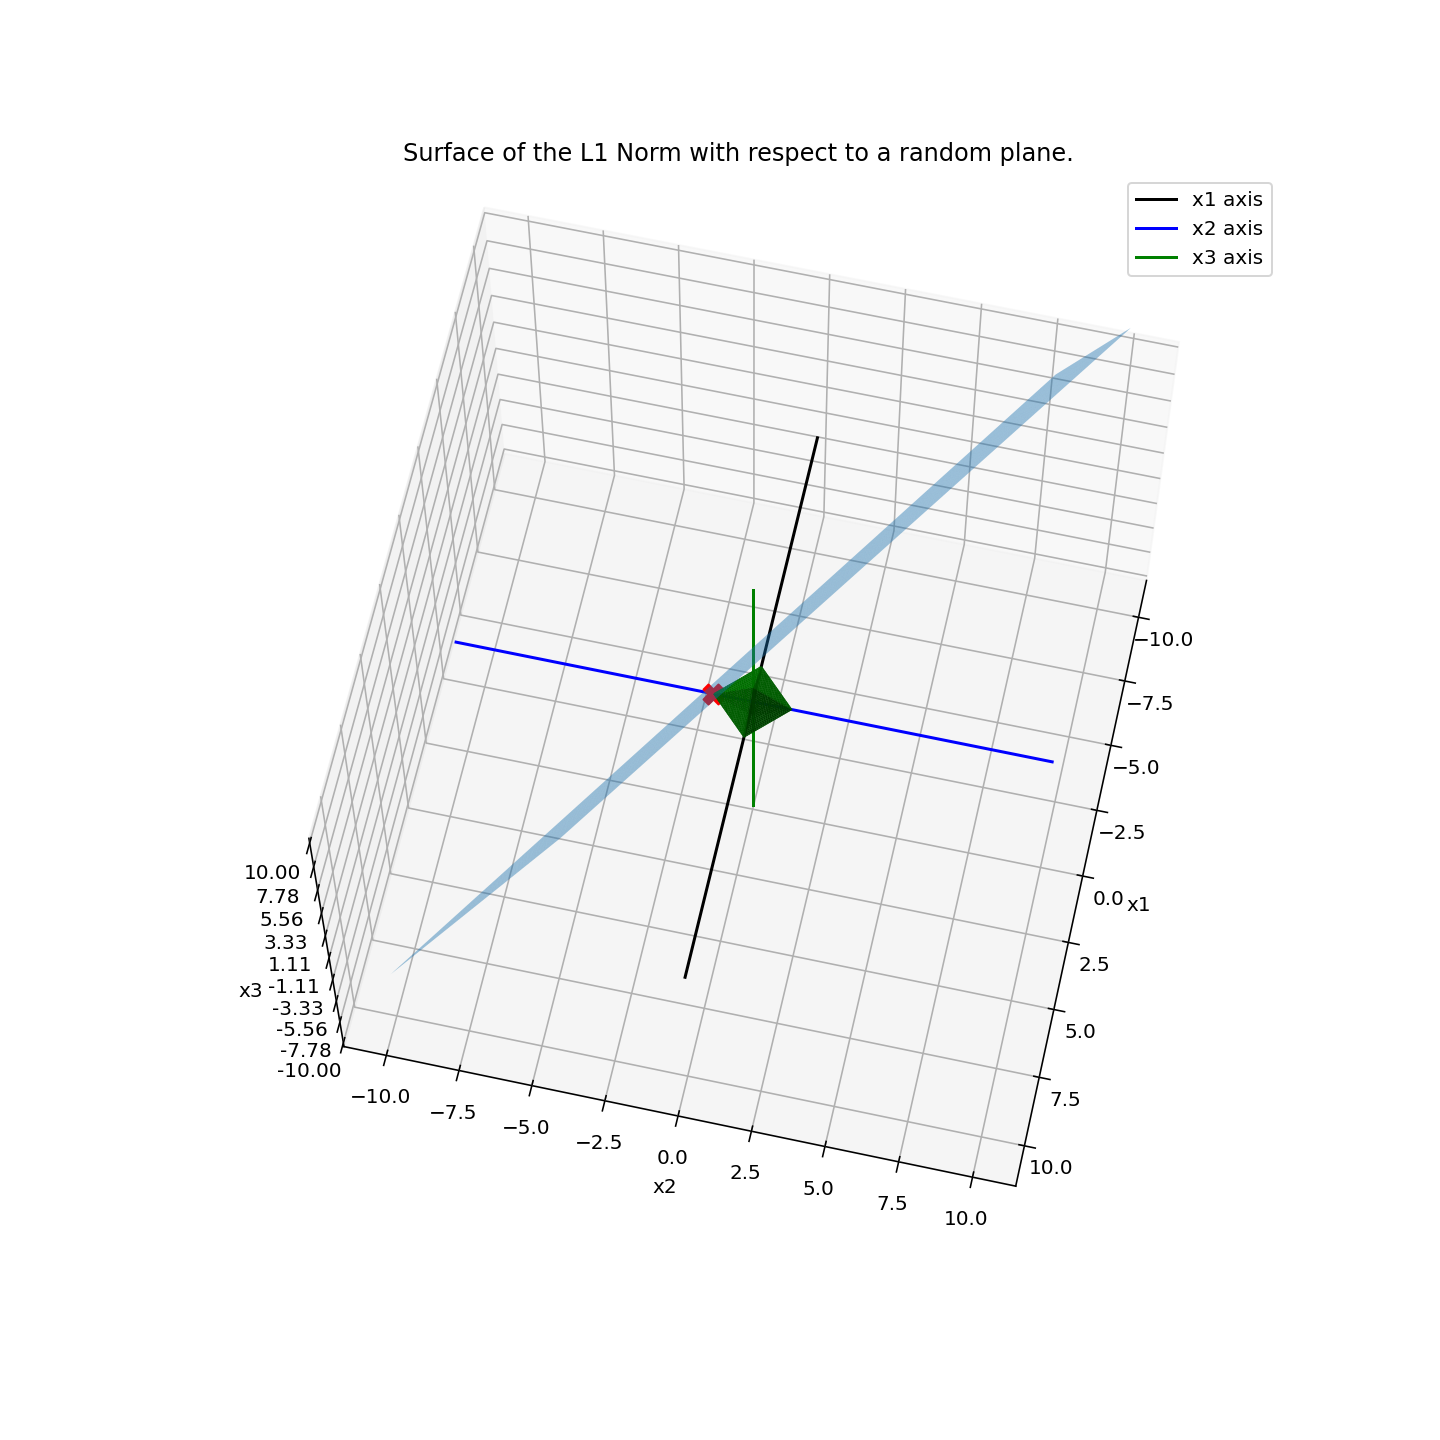

In [152]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})

# Make data.
X1, X2 = np.meshgrid(x1, x2)
X3 = plane_func(X1, X2)

# Plot the surface.
surf = ax.plot_surface(X1, X2, X3, alpha=.5)
pos_norm_surf = ax.plot_surface(x1n_pos, x2n_pos, x3n_pos, alpha=1, color='green')
neg_norm_surf = ax.plot_surface(x1n_neg, x2n_neg, x3n_neg, alpha=1, color='green')

ax.plot([-10,10],[0,0], [0,0], color='black',label='x1 axis')
ax.plot([0,0],[-10,10], [0,0], color='blue', label='x2 axis')
ax.plot([0,0],[0,0],[-10,10],color='green',label='x3 axis')

# Customize the z axis.
ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Surface of the L1 Norm with respect to a random plane.')

xx, yy, zz = min_coords


ax.scatter(xx, yy, zz, c='red', marker='X', s=100)

plt.legend()

plt.show()

In [28]:
norm = 1.330000000001375 # from above, not actual norm